In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [3]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler

from imblearn.over_sampling import SMOTE

In [5]:
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv('test (1).csv')

In [6]:
print('training dataset shape is :',train_df.shape)
print('testing dataset shape is :',test_df.shape)

training dataset shape is : (8693, 14)
testing dataset shape is : (4277, 13)


In [7]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")


Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


In [10]:
print("Data Types of feature of Training Data is :")
print(train_df.dtypes)
print("\n"+"-"*100)
print("\nData types of feature of Testing Data is:")
print(test_df.dtypes)

Data Types of feature of Training Data is :
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

----------------------------------------------------------------------------------------------------

Data types of feature of Testing Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [11]:
#checking total number & percentage of missing values in training Datasets
df1  = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"number of missing value"})
df1["% of missing Values"] = round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1

,number of missing value,% of missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [12]:
#checking total number & percentage of missing values in training Datasets
df2  = (test_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"number of missing value"})
df2["% of missing Values"] = round((100*test_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df2

,number of missing value,% of missing Values
HomePlanet,87,1.00
CryoSleep,93,1.07
Cabin,100,1.15
Destination,92,1.06
Age,91,1.05
VIP,93,1.07
RoomService,82,0.94
FoodCourt,106,1.22
ShoppingMall,98,1.13
Spa,101,1.16


In [13]:
 # Checking cardinality of Categorical features.   or unique values
print("cardinality of categorical feature in trainning datasets is :")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\ncardinality of categorical feature in testing datasets is: ")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical feature in trainning datasets is :
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

cardinality of categorical feature in testing datasets is: 
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


# Exploratory Data Analysis(EDA)

# 1. Visualizing Target Data("Transported")

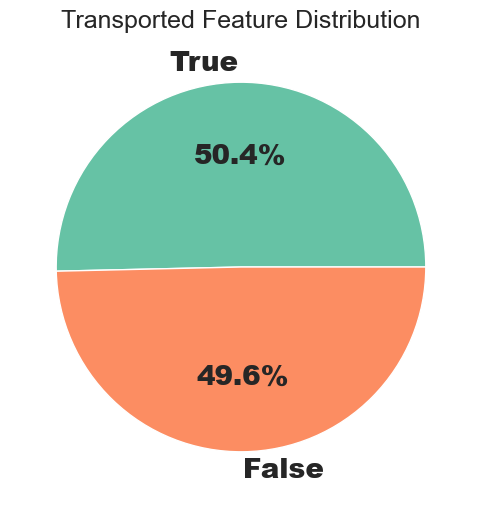

In [14]:
plt.figure(figsize=(10,6))
counts = train_df["Transported"].value_counts()

plt.pie(
    counts,
    labels=counts.index,   # <- Use index from value_counts
    autopct="%1.1f%%",
    textprops={"fontsize":20,"fontweight":"black"},
    colors=sns.color_palette("Set2")
)
plt.title("Transported Feature Distribution")
plt.show()


# Visualizing "Age" Feature.

In [15]:
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set1")
plt.title("Age feature Distribution");

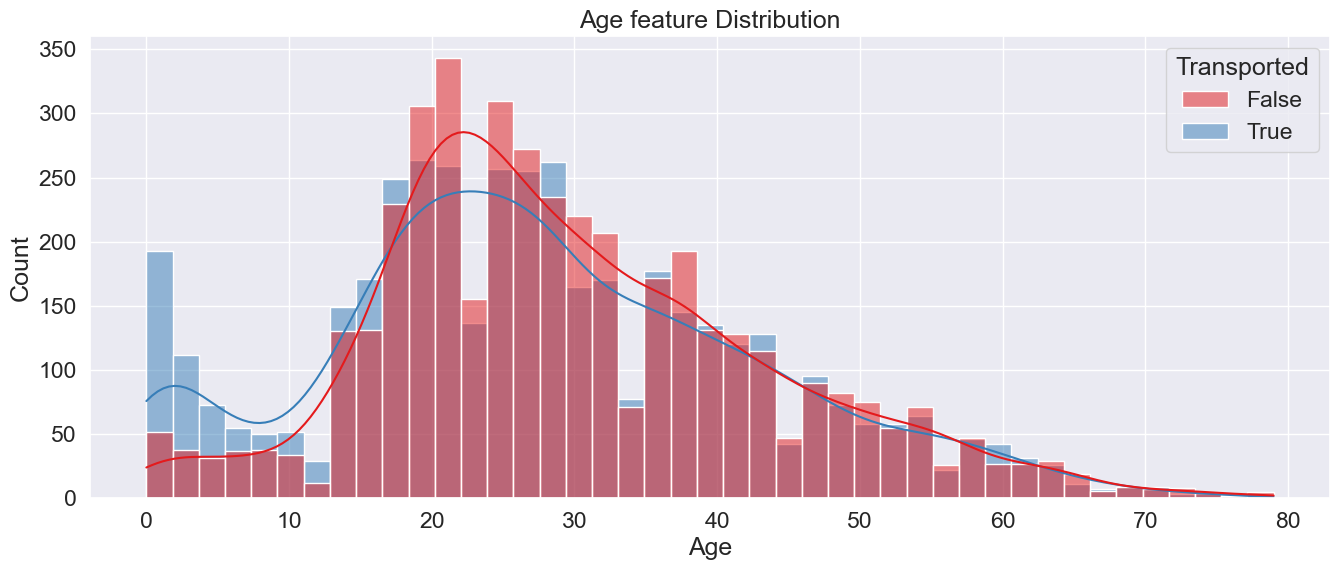

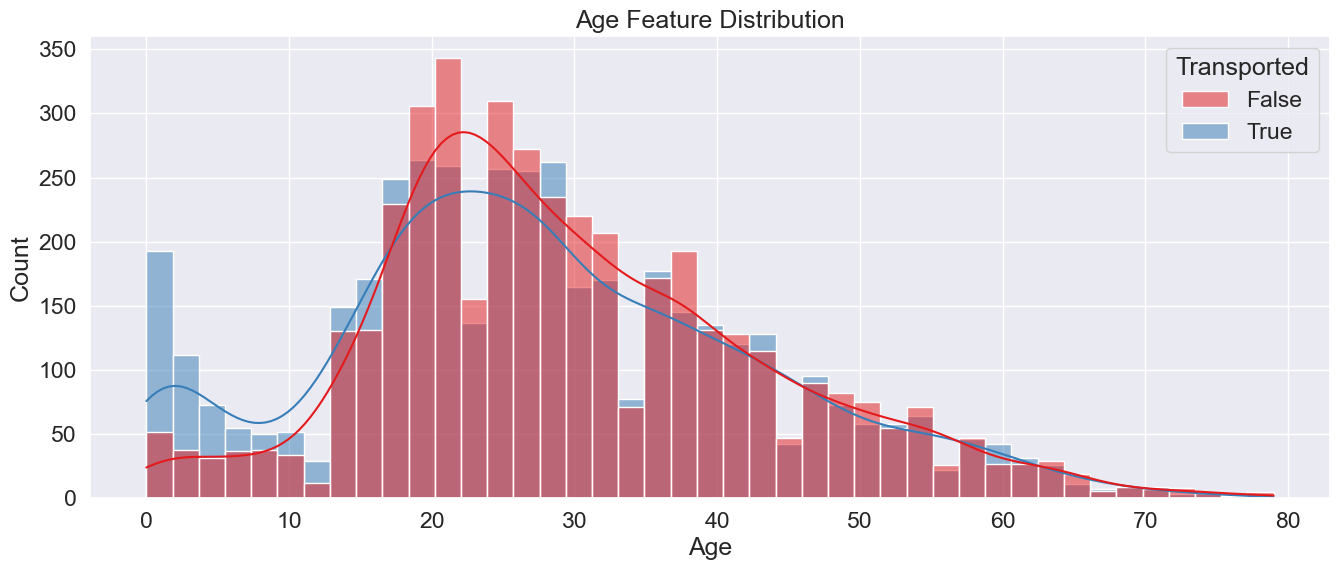

In [16]:
plt.figure(figsize=(16,6))
sns.histplot(x="Age", hue="Transported", data=train_df, kde=True, palette="Set1")
plt.title("Age Feature Distribution")
plt.show()


### Visualizing all Expenditure features ("RoomService","FoodCourt","ShoppingMall","Spa","VRDeck")

In [17]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx, column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column,hue="Transported",data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

### Visualizing categorical feature ("HomePlanet","CrySleep","Destination","VIP")

In [18]:
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx, column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column,hue="Transported",data=train_df,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

# Feature Engineering

### creating new feature from "PassengerId" Feature,

In [19]:
train_df["PassengerId"].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


In [20]:
def passengerid_new_feature(df):
    #splitting Group and Member values from "passengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"]  = df["PassengerId"].apply(lambda x: x.split("_")[1])

    # Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()

    #Creating a set of group values which are travelling with more than 1 members
    y = set(x[x>1].index)

    #creating a new feature "solo" which will indicate wheather the person is travelling solo or not.
    df["Travelling_solo"] = df["Group"].apply(lambda x: x not in y)

    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_size"]=i[1]

In [21]:
passengerid_new_feature(train_df)
passengerid_new_feature(test_df)

In [22]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_solo,Group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1


### we don't require Group & Member features any more so will drop those feature from both datasets

In [23]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

In [24]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1


### Visualizing "Group_Size" & "Travelling_solo" Features.

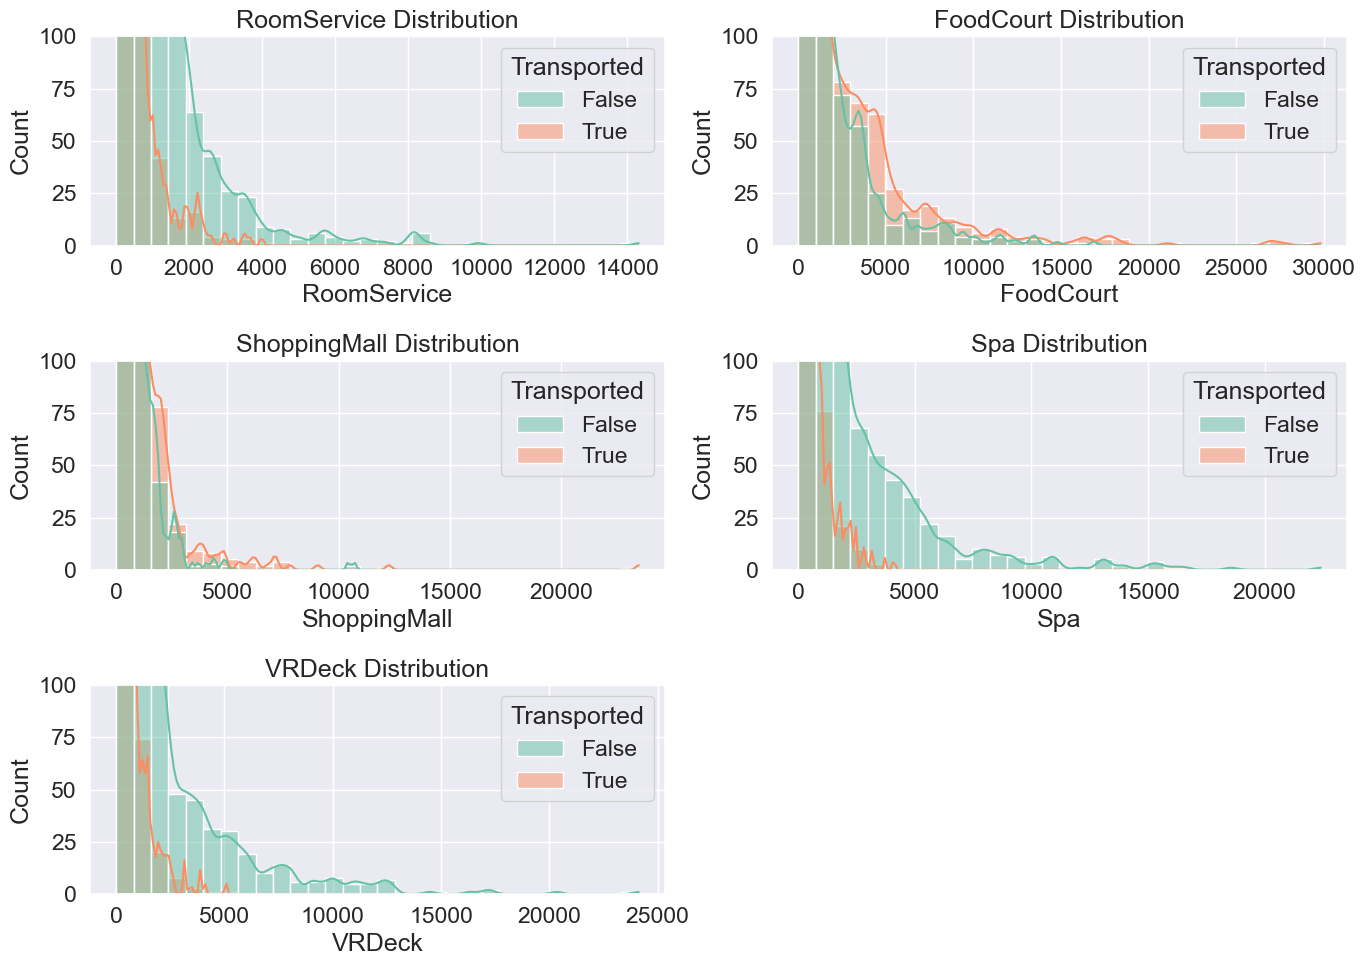

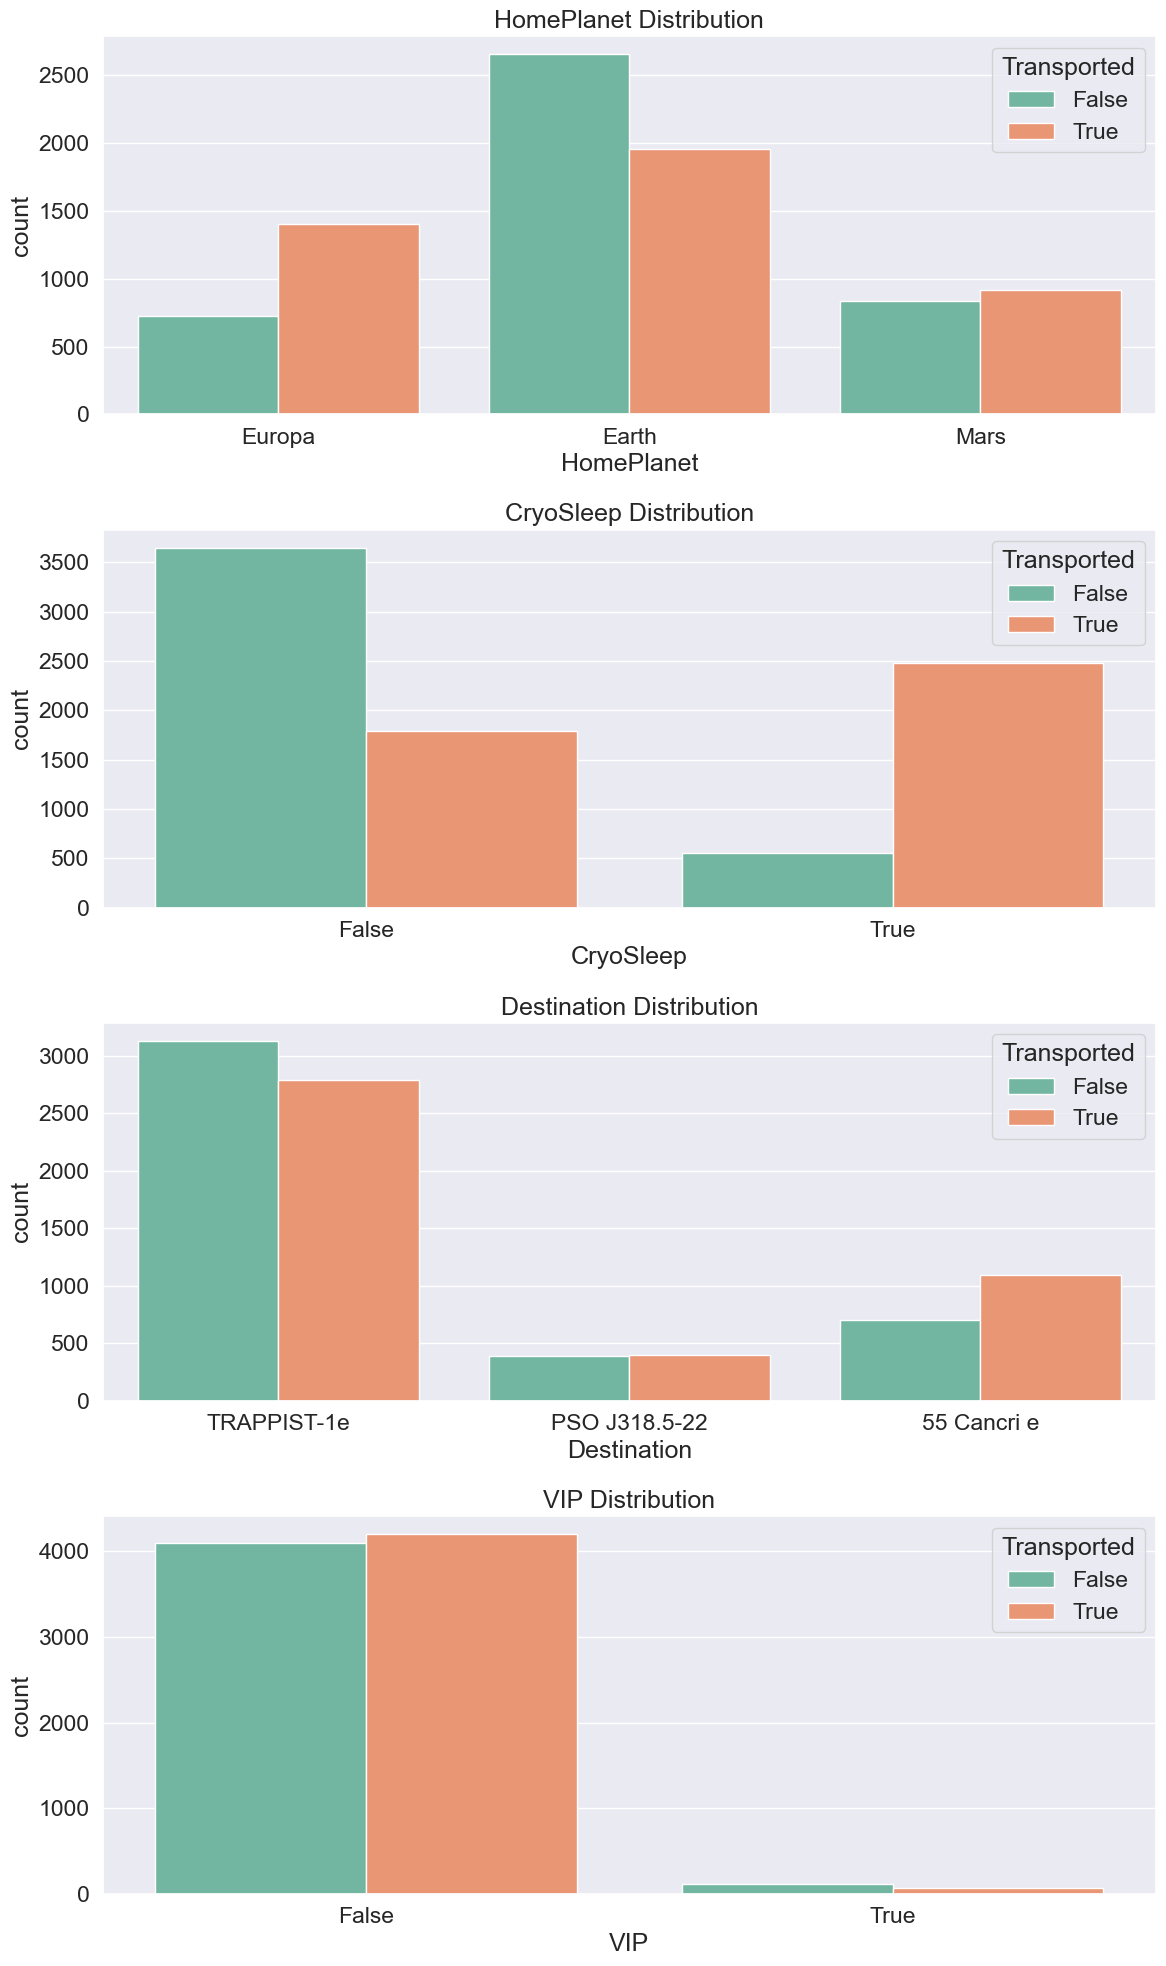

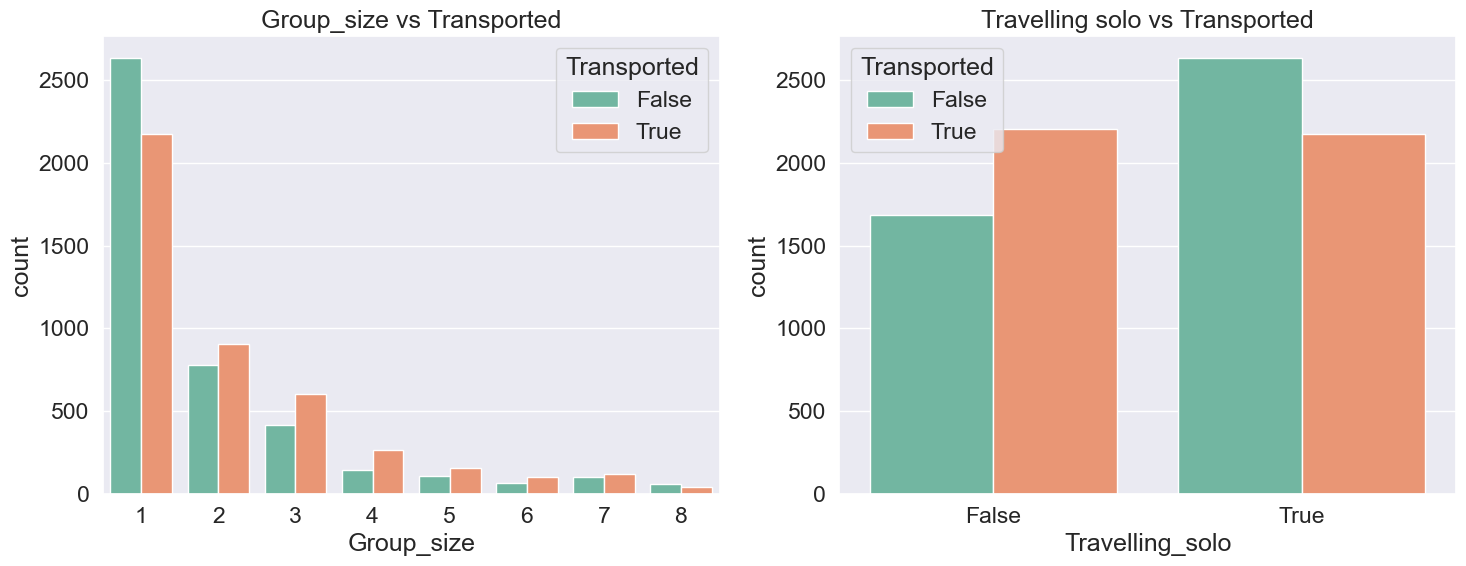

In [25]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_size",hue="Transported",data=train_df,palette="Set2")
plt.title("Group_size vs Transported")


plt.subplot(1,2,2)
sns.countplot(x="Travelling_solo",hue="Transported",data=train_df,palette="Set2")
plt.title("Travelling solo vs Transported")
plt.tight_layout()
plt.show()

### 2. Creating New Feature using "Cabin Feature

In [26]:
train_df["Cabin"].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [27]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
    
    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].mode()[0],inplace=True)

In [28]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

In [29]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Number,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,1,S


## Visualizing "Cabin_Number" Feature

In [30]:
train_df["Cabin_Number"]=train_df["Cabin_Number"].astype(int)
test_df["Cabin_Number"]=test_df["Cabin_Number"].astype(int)

In [31]:
print("Total unique values present in Cabin_Number is:",train_df["Cabin_Number"].nunique())
print("Total Mean of Cabin_Number feature is:",train_df["Cabin_Number"].mean())
print("Total Median of Cabin_Number feature is:",train_df["Cabin_Number"].median())
print("Total Minimum value Cabin_Number feature is:",train_df["Cabin_Number"].min())
print("Total Maximum value Cabin_Number feature is:",train_df["Cabin_Number"].max())

Total unique values present in Cabin_Number is: 1817
Total Mean of Cabin_Number feature is: 588.5012078683999
Total Median of Cabin_Number feature is: 407.0
Total Minimum value Cabin_Number feature is: 0
Total Maximum value Cabin_Number feature is: 1894


In [32]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black");

### 3.Creating New Feature "Cabin_Regions" from "Cabin_Number".

In [33]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)


In [34]:
cabin_regions(train_df)
cabin_regions(test_df)

### 4. Creating New Feature From "Age"

In [35]:
train_df["Age"].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [36]:
def age_group(df):
    age_group = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
             age_group.append("Age_0-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_25-32")
        elif (i>32 and i<=50):
            age_group.append("Age_32-50")
        elif (i>50):
            age_group.append("Age 50+")
        else:
            age_group.append(np.nan)
    df["Age Group"] = age_group
            
            
        
            
            
        
            
        
            

In [37]:
age_group(train_df)
age_group(test_df)

## Visualizing "Age Group" Feature.

In [38]:
order = sorted(train_df["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported",data=train_df,palette="Set2",order=order)
plt.title("Age Group Distribution");

### 5. creating New Feature Using All Expenditude Features

In [39]:
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [40]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)

In [41]:
new_exp_features(train_df)
new_exp_features(test_df)

In [42]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Number,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P,True,False,False,False,False,False,Age_32-50,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S,True,False,False,False,False,False,Age_19-25,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S,True,False,False,False,False,False,Age 50+,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,0,S,True,False,False,False,False,False,Age_32-50,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,1,S,True,False,False,False,False,False,Age_0-18,1091.0,False


## Visualizing "Total Expenditure" Feature.

In [43]:
 plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure",hue="Transported",data=train_df,kde=True,palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distribution");

## Generating some statistical information from Total Expenditure feature

In [44]:
mean = round(train_df["Total Expenditure"].mean())
median = train_df["Total Expenditure"].median()

print("Mean value of Total Expenditure feature is = ",mean)
print("Median value of Total Expenditure feature is = ",median)

Mean value of Total Expenditure feature is =  1441
Median value of Total Expenditure feature is =  716.0


In [45]:
def expenditure_category(df):
    expense_category = []

    for  i in df["Total Expenditure"]:
        if i == 0:
            expense_category.append("NO Expense")
        elif (i> 0 and i<=716):
            expense_category.append("Low Expense")
        elif (i> 716 and i<=1441):
            expense_category.append("Low Expense")
        elif (i>1441):
            expense_category.append("High Expense")


    df["Expenditure Category"] = expense_category            
        
            
            
        
            
        



In [46]:
expenditure_category(train_df)
expenditure_category(test_df)

In [47]:
cols = ["No Spending","Expenditure Category"]

plt.figure(figsize=(18,6))
for idx, column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column,hue="Transported",data=train_df,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

# Data Pre-Processing

In [48]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Number,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P,True,False,False,False,False,False,Age_32-50,0.0,True,NO Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S,True,False,False,False,False,False,Age_19-25,736.0,False,Low Expense
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S,True,False,False,False,False,False,Age 50+,10383.0,False,High Expense
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,0,S,True,False,False,False,False,False,Age_32-50,5176.0,False,High Expense
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,1,S,True,False,False,False,False,False,Age_0-18,1091.0,False,Low Expense


## 1. Checking Missing Values.

In [49]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z

,No of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


## 2. Visualizing Missing Numbers

In [50]:
!pip install missingno


Defaulting to user installation because normal site-packages is not writeable


In [51]:
import missingno as msno

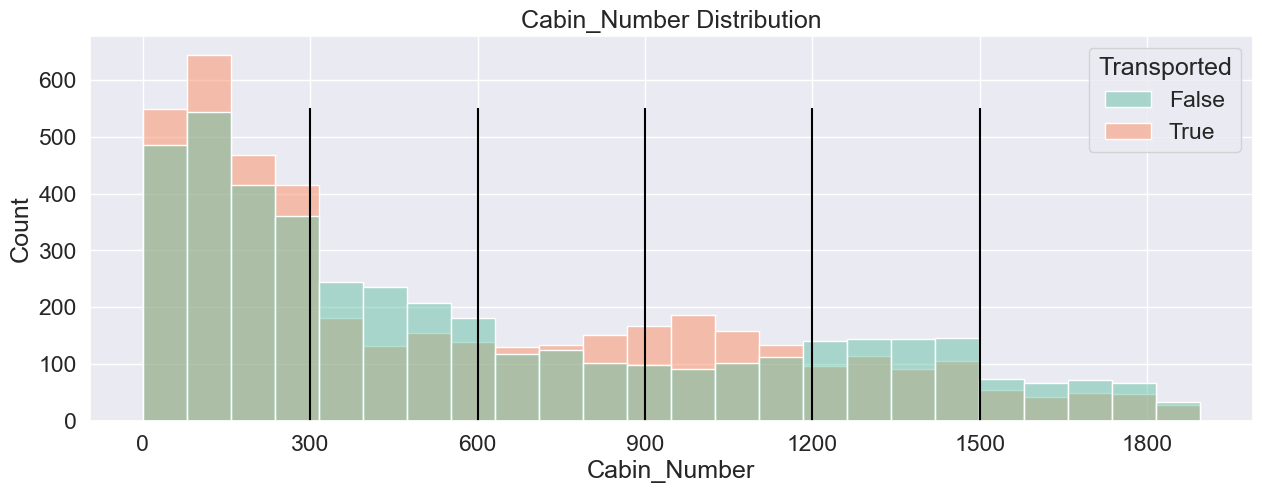

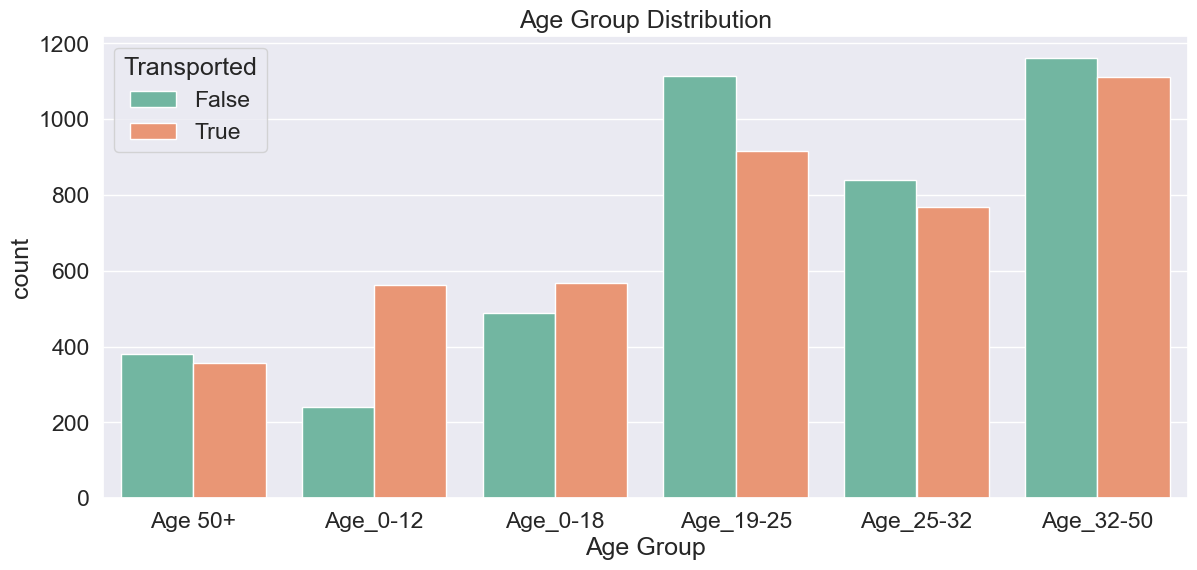

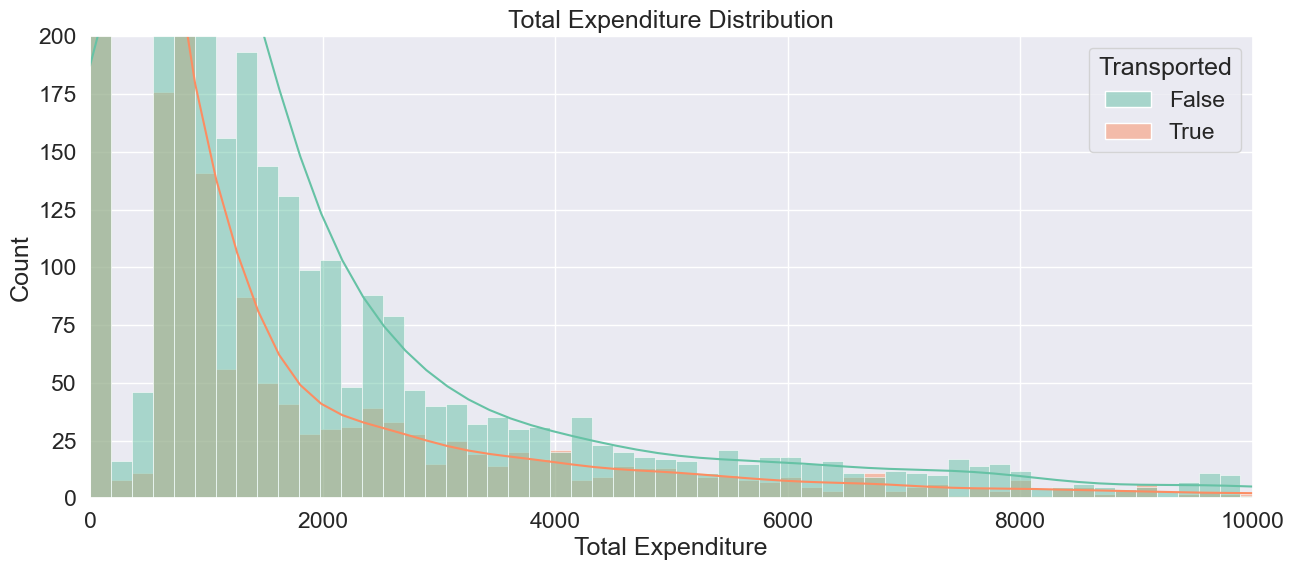

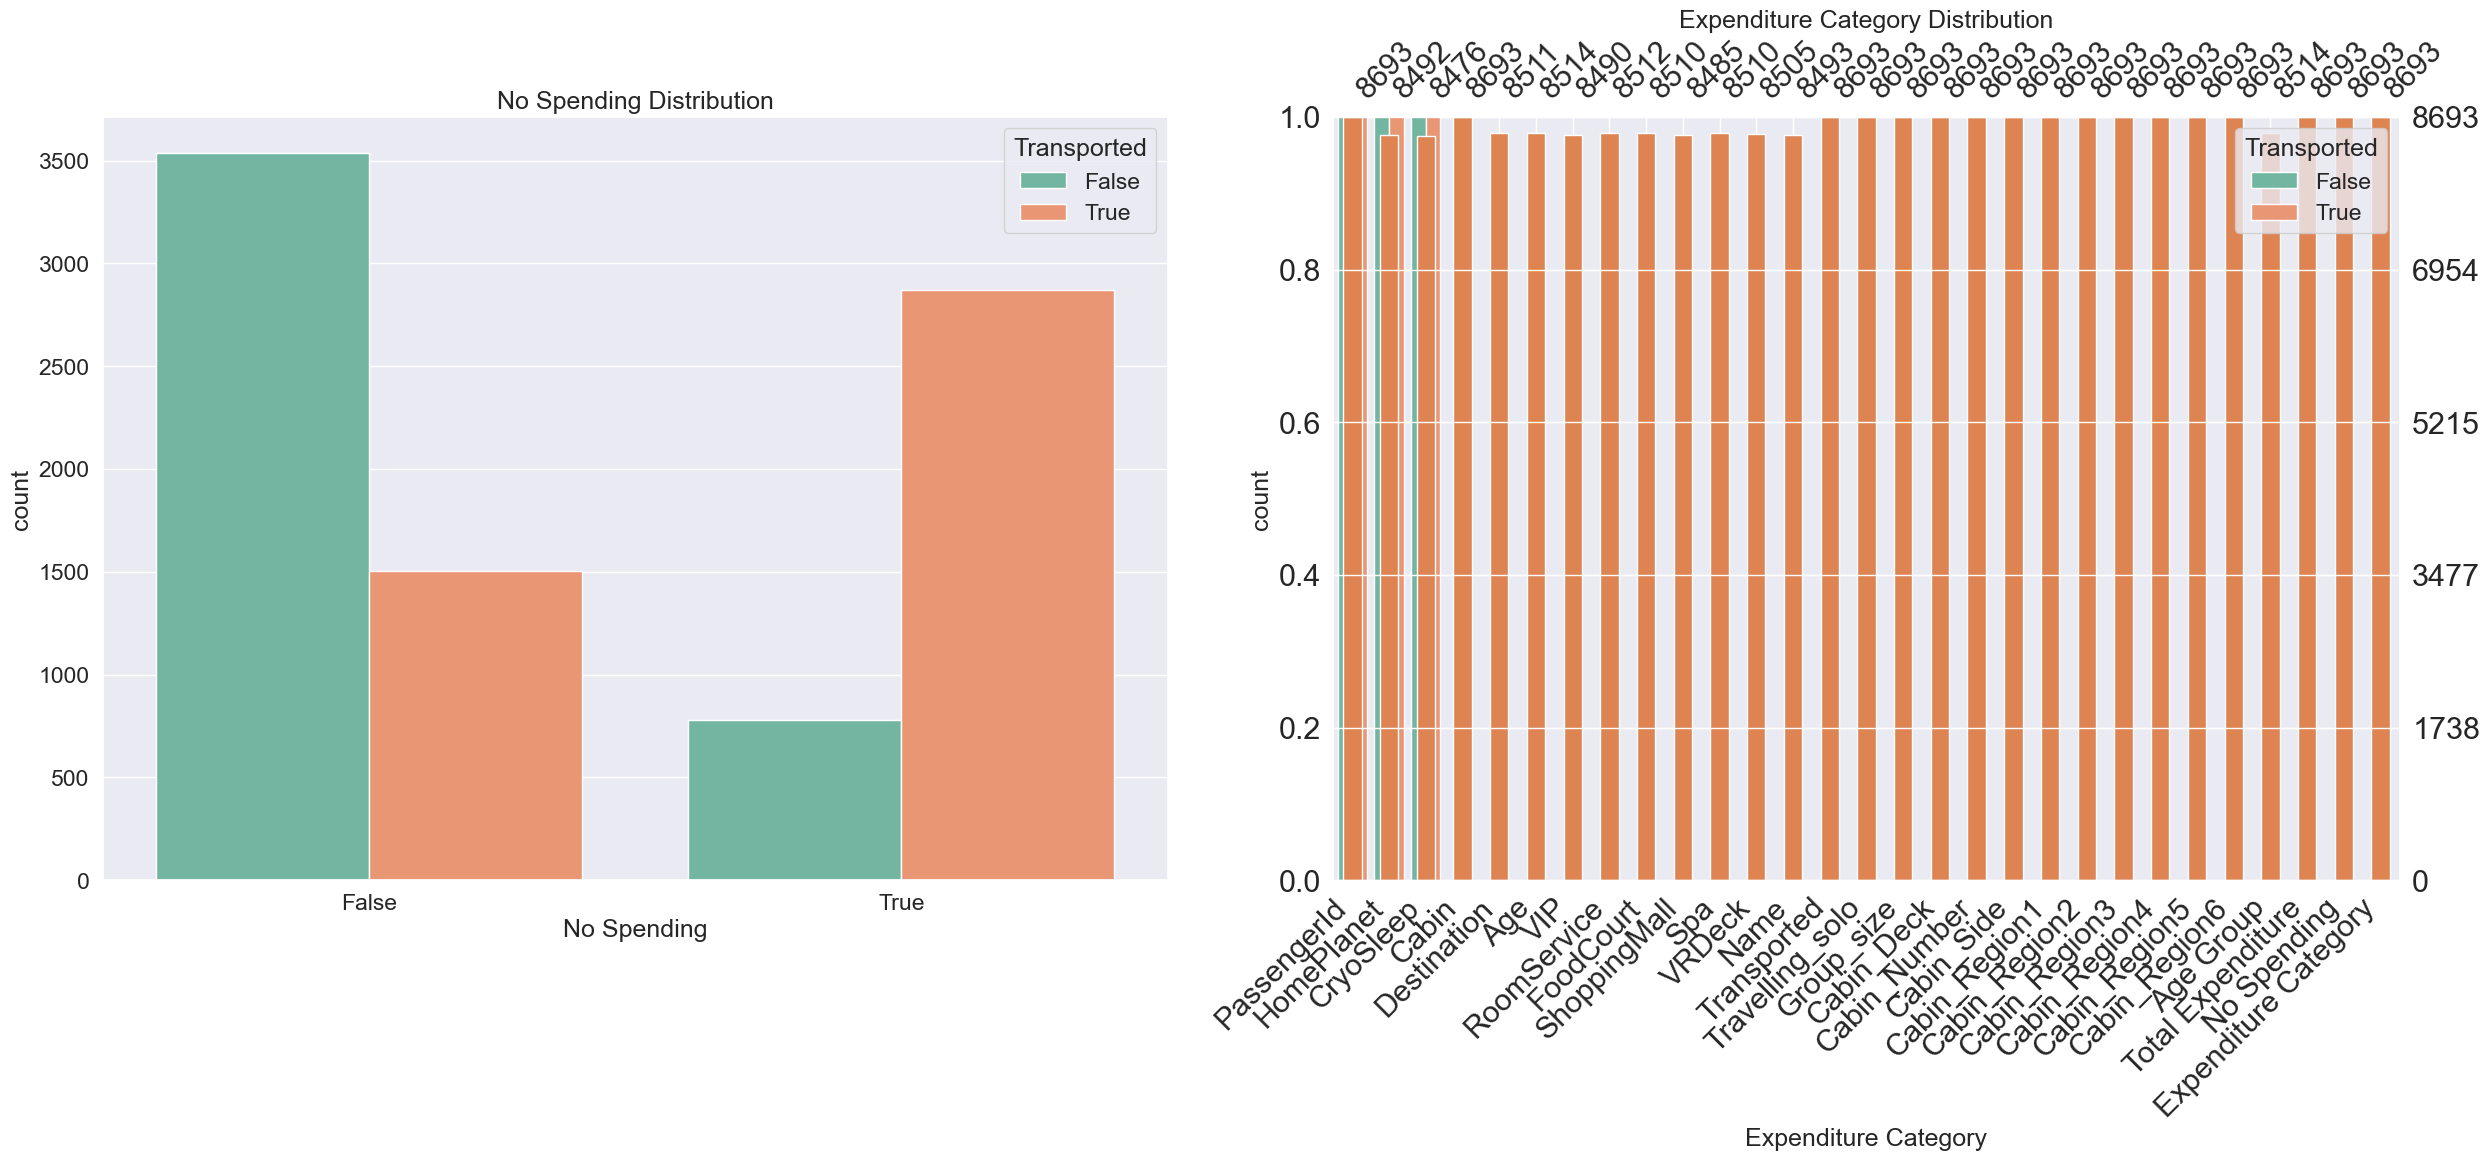

In [52]:
msno.bar(train_df,color="C1",fontsize=22)
plt.show()

## 3. Another way to visualize missing Values

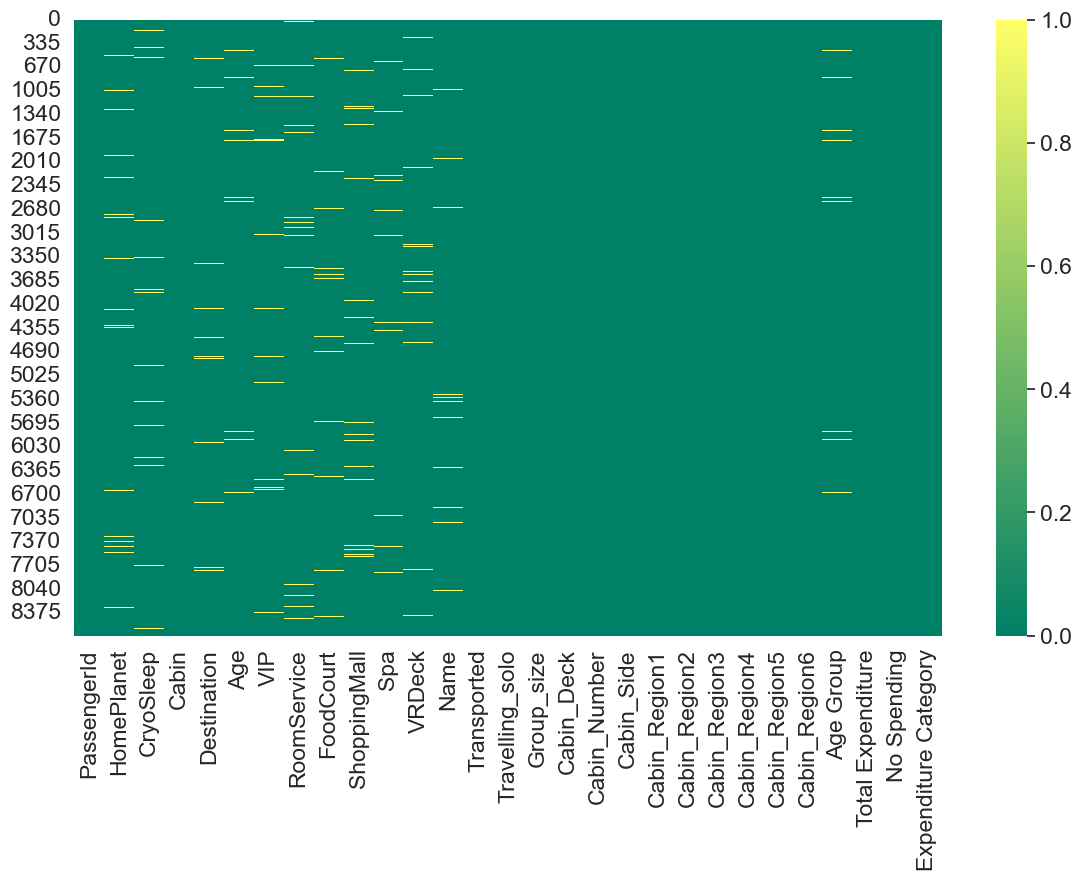

In [53]:
plt.figure(figsize=(14,8))
sns.heatmap(train_df.isnull(),cmap="summer")
plt.show()

## 4. Handling Missing values

In [90]:
cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

ValueError: list.remove(x): x not in list

In [91]:
print("Categorical Columns:",cat_cols)
print("\n","-"*120)
print("\nNumerical Columns:",num_cols)

Categorical Columns: ['Cabin_Deck', 'Cabin_Side', 'Age Group', 'Expenditure Category', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']

 ------------------------------------------------------------------------------------------------------------------------

Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_size', 'Cabin_Number', 'Total Expenditure']


## using Simple Imputer Library to fill Miising Values

In [92]:
imputer1 = SimpleImputer(strategy="most_frequent")
imputer2 = SimpleImputer(strategy="median")

In [93]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [94]:
fill_missingno(train_df)
fill_missingno(test_df)

In [95]:
print("Missing number left in train_df is:",train_df.isnull().sum().sum())
print("Missing number left in test_df is :",test_df.isnull().sum().sum())

Missing number left in train_df is: 0
Missing number left in test_df is : 0


## 5. Checking Duplicacy in Data.

In [96]:
print("Duplicate values in training data is: ", train_df.duplicated().sum())
print("Duplicate values in testing data is: ", test_df.duplicated().sum())

Duplicate values in training data is:  18
Duplicate values in testing data is:  11


## 6. checking cardinality of Categorical Features.

In [97]:
print("Categorical of feature in numerical data is:")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\ncardinality of feature in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Categorical of feature in numerical data is:
Cabin_Deck                   8
Cabin_Side                   2
Age Group                    6
Expenditure Category         3
HomePlanet_Earth             2
HomePlanet_Europa            2
HomePlanet_Mars              2
Destination_55 Cancri e      2
Destination_PSO J318.5-22    2
Destination_TRAPPIST-1e      2
dtype: int64

 --------------------------------------------------

cardinality of feature in categorical data is: 
Cabin_Deck                   8
Cabin_Side                   2
Age Group                    6
Expenditure Category         3
HomePlanet_Earth             2
HomePlanet_Europa            2
HomePlanet_Mars              2
Destination_55 Cancri e      2
Destination_PSO J318.5-22    2
Destination_TRAPPIST-1e      2
dtype: int64


## Dropping categorical features with high cardinality

In [98]:
pass_df = test_df[["PassengerId"]]

KeyError: "None of [Index(['PassengerId'], dtype='object')] are in the [columns]"

In [ ]:
cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)

## 7. Gathering Statistical information of Numerical Features.

In [ ]:
train_df.describe().T

## 8. Applying log Transformation on Expenditure features.

In [ ]:
cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Total Expenditure"]
for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value] = np.log(1+test_df[value])

## Visualizing these feature after Transformation

In [99]:
x = 1
plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x +=1

## checking Data - Types of Features.

In [100]:
train_df.dtypes

CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
Travelling_solo                int64
Group_size                   float64
Cabin_Deck                    object
Cabin_Number                 float64
Cabin_Side                    object
Cabin_Region1                  int64
Cabin_Region2                  int64
Cabin_Region3                  int64
Cabin_Region4                  int64
Cabin_Region5                  int64
Cabin_Region6                  int64
Age Group                     object
Total Expenditure            float64
No Spending                    int64
Expenditure Category          object
HomePlanet_Earth              object
HomePlanet_Europa             object
HomePlanet_Mars               object
D

## changing Data - Type to Boolean

In [101]:
cols = ["CryoSleep","VIP","Travelling_solo","No Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]
train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

## 7. Feature Encoding

In [102]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_solo","No Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

## Label Encoding

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
enc = LabelEncoder()

In [105]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

## One Hot Encoding

In [106]:
train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)

KeyError: "None of [Index(['HomePlanet', 'Destination'], dtype='object')] are in the [columns]"

In [ ]:
train_df["Transported"].replace({False:0,True:1},inplace=True)

## checking all feature are encoded or not

In [ ]:
train_df.head()

In [ ]:
test_df.head()

## 8. Selecting Feature & Labels For Model Training.

In [ ]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

## 9. Feature Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
# Train par fit + transform
X_scaled = scaler.fit_transform(X)

# Test par sirf transform (no fit!)
test_df_scaled = scaler.transform(test_df)


In [ ]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

## 10. splitting Data for model which don't need Scaled Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape,y_train.shape)

In [ ]:
print(x_test.shape,y_test.shape)

## 11. Splitting Data for model which Need Scaled Data.

In [ ]:
x_train1, x_test1,y_train1,y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train1.shape,y_train1.shape)

In [ ]:
print(x_test1.shape,y_test1.shape)

# Model Building For Scaled Data 

In [107]:
train_score = []
testing_score=[]

In [110]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

# 1. Logistic Regression Model.

In [111]:
model_prediction(LogisticRegression())

NameError: name 'x_train1' is not defined